# Grover's Algorithm

このセクションでは、"Grover's Algorithm(グローバーアルゴリズム)"と、それを使用して、"unstructured search problem(非構造化検索の問題)"を解決する方法を紹介します。次に、Qiskitを使用して、量子アルゴリズムを実装し、シミュレーターとデバイスで実行します。

## 1. Introduction

量子コンピュータが古典的なコンピュータよりも優れている利点の1つは、データベースの高速検索であると聞いたことがあるでしょう。Groverのアルゴリズムは、この機能を示しています。このアルゴリズムは、非構造化検索の問題の2次式的に高速化できますが、このアルゴリズムにはそれ以上に効果的な用途が存在します。それは、他の様々なアルゴリズムの2次ランタイムを改善するための一般的なトリックまたはサブルーチンとしての機能です。これは、"the amplitude amplification trick(振幅増幅トリック)"と呼ばれます。

#### Unstructured Search

N個のアイテムの大きなリストが表示されたとします。これらのアイテムの中には、特定したい固有のプロパティを持つアイテムが1つあります。これをwinner wと呼びます。リストの各アイテムを特定の色のボックスと考えてください。ピンクのwinner wを除いた、リストの全ての項目が灰色であるとしましょう。

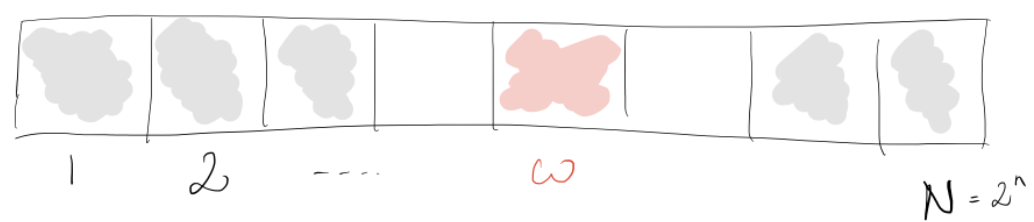

ピンク色のボックス(マークされたアイテム)を見つけるには、古典的な計算を使用して、これらのボックスの平均N/2を確認し、最悪の場合は全てのNを確認する必要があります。ただし、量子コンピュータでは、Groverの振幅増幅トリックを使用して、およそ√Nステップでマークされたアイテムを見つけることができます。2次式的な高速化は確かに、長いリストでマークされたアイテムを見つけるためのかなりの時間を節約することができます。さらに、アルゴリズムはリストの内部構造を使用しないため、リストが汎用的になります。これが、多くの古典的な問題に対して2次の量子高速化を即座に提供できる理由です。

####  Oracle

リスト項目はどのように量子コンピュータに提供されるか？リストをエンコードする一般的な方法は、マークされていない全てのアイテムxに対してf(x) = 0を返し、winnerに対してf(w) = 1を返す関数fに関するものです。この問題に量子コンピュータを使用するためには、この関数に重ねてアイテムを提供する必要があるため、関数を"oracle(オラクル)"と呼ばれるユニタリ行列にエンコードします。最初に、アイテムx

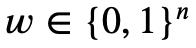

のバイナリエンコーディングを選択して、N=2^nにします。これで、量子コンピュータ上のqubitでそれを表すことができます。次に、オラクル行列Ufを定義して、

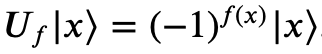

によって単純な標準基底状態|x>のいずれかに作用します。

#### Amplitude Amplification

それでは、アルゴリズムはどのように機能するのか？アイテムのリストを見る前に、マークされたアイテムがどこにあるのかわかりません。したがって、その場所の推測は他のものと同じくらい優れており、均一な重ね合わせで表現できます。

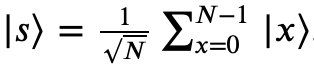

この時点で標準基底{|x>}で測定すると、この重ね合わせは、第5量子法則に従って、

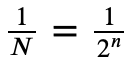

の等しい確率で、基底状態のいずれかに崩壊します。

従って、予想されるように、正しい値wを推測する可能性は2^n回に1回です。従って、正しいアイテムを推測するには、平均してN = 2^n回試行する必要があります。

振幅増幅と呼ばれる手順を入力してください。これは、量子コンピュータがこの確率を大幅に向上させる方法です。この手順では、マークされたアイテムの振幅を伸ばし(増幅)し、他のアイテムの振幅を縮小します。これにより、最終状態を測定すると、ほぼ確実に正しいアイテムが返されます。

このアルゴリズムは、2次元平面で回転を生成する2つの反射という点で、優れた幾何学的解釈を備えています。私たちが考慮しなければならない2つの特別な状態は、winner|w>と均一な重ね合わせ|s>です。これらの2つのベクトルは、ベクトル空間C^Nの2次元平面に広がります。|w>が振幅N^(-1/2)の重ね合わせでも発生するため、これらは完全に垂直ではありません。ただし、これらの2つのベクトルのスパンにある追加の状態|s'>を導入できます。これは、|w>に垂直であり、|s>から|w>を削除して再スケーリングすることで得られます。

#### Step 1

振幅増幅手順は、

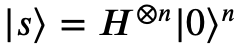

から簡単に構築される均一な重ね合わせ|s>から始まります。

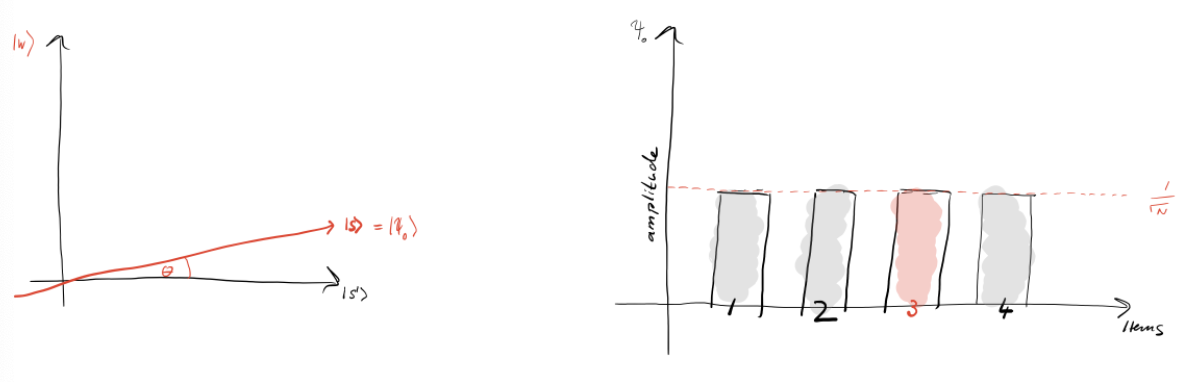

左側のグラフィックは、垂直ベクトル|w>及び|s'>が張られた2次元平面に対応し、初期状態を

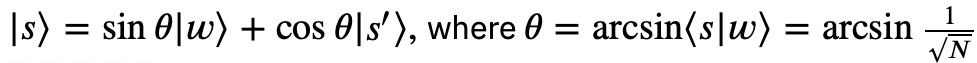

として表すことができます。

右の図は、N = 2^2 = 4の場合の状態|s>の振幅の棒グラフです。平均振幅は波線で示されています。

#### Step 2

オラクル反射Ufを状態|s>に適用します。

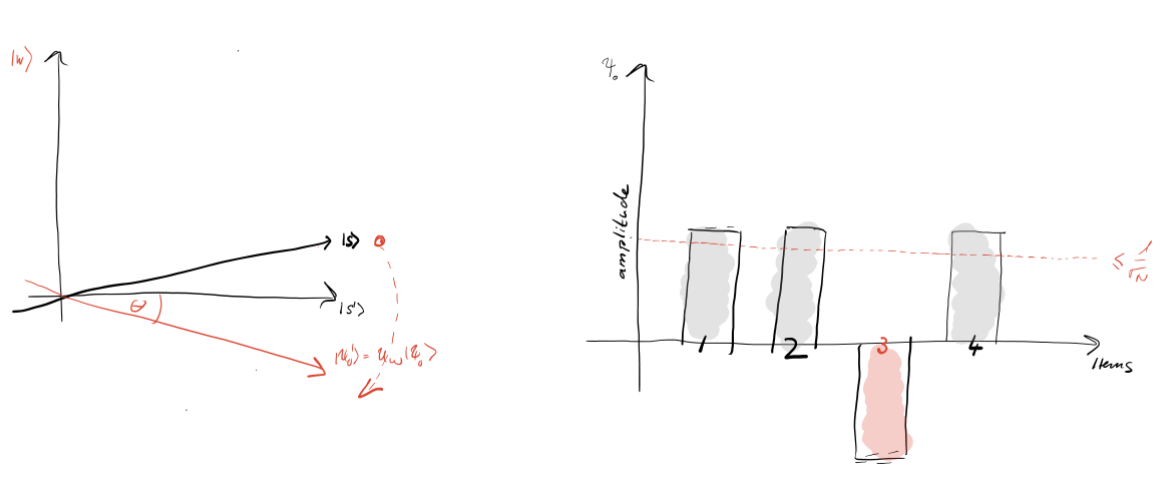

幾何学的にこれは、|s'>についての状態|s>の反映に対応します。この変換は、|w>状態の前の振幅が負になることを意味します。これは、平均振幅が低下したことを意味します。

#### Step 3

次に、以下の状態について、追加の反射Usを適用します。

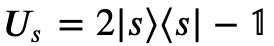

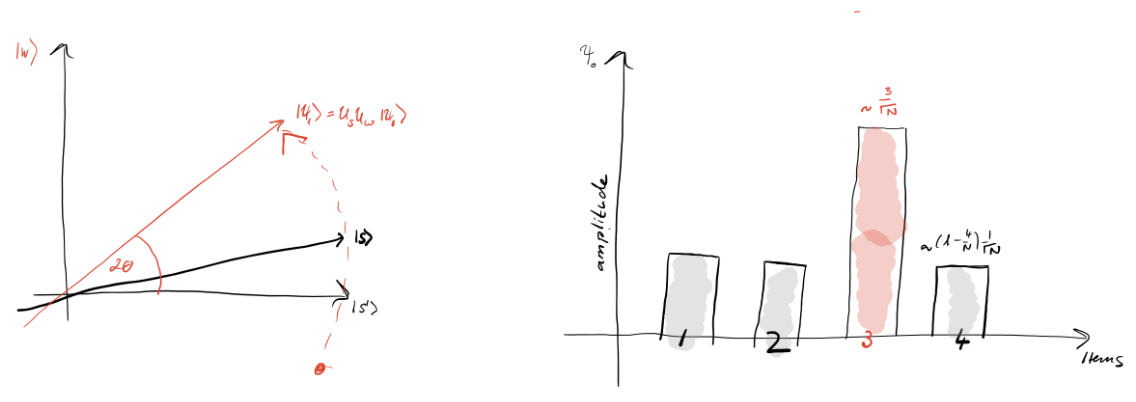

2つの反射は常に回転に対応します。変換UsUfは、初期状態|s>をwinner|w>に近づけます。振幅棒グラフの反射Usの作用は、平均振幅に関する反射として理解できます。最初の反射によって平均振幅が低下したため、この変換により、|w>の負の振幅が元の値の約3倍にブーストされ、他の振幅は減少します。次に、ステップ2に進み、アプリケーションを繰り返します。この手順を数回繰り返して、winnerを絞り込みます。

t回繰り返したら、|ψt>状態になります。

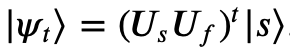

このローテーションを何回適用する必要があると思いますか？およそ、√N回転で十分であることがわかります。これは、状態の振幅|ψ>を見ると明らかになります。|w>の振幅は、アプリケーションの数~tN~(-1/2)とともに直線的に増加する(比例する)ことがわかります。ただし、確率ではなく振幅を扱っているため、ベクトル空間の次元は平方根として入ります。従って、この手順で増幅されるのは、確率ではなく振幅です。

複数の解決策Mがある場合、およそ√(N/M)回転で十分であることが示されます。

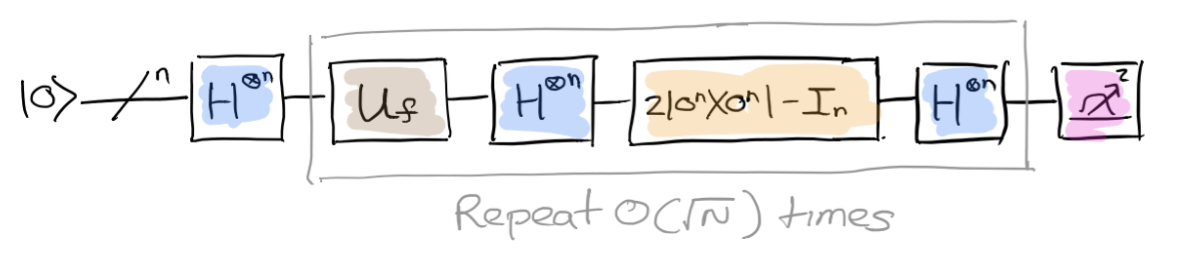

## 2. Example : 2 Qubits

まず、2qubitsで実現されるN = 4のGroverアルゴリズムの場合を見てみましょう。この特定のケースでは、考えに反して、初期状態|s>をwinner|w>に回転させる1回の回転のみが必要です。

1. 上記の紹介に続いて、N=4の場合

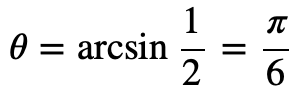

2. tステップ後

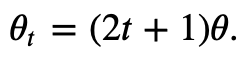

の

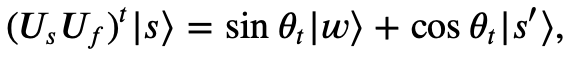

3. |w>を取得するには、θt = π/2が必要です。θ=π/6を上記の結果に挿入して、t = 1にします。これは、t=1回転後に検索された要素が見つかることを意味します。

次に、可能なオラクルを調べてみましょう。N = 4の可能な要素、つまり|00>、|01>、|10>、|11>があるため、合計4つのオラクルが必要です。

#### Oracle for |w> = |11>

|w>=|11>の場合から始めましょう。この場合のオラクルは次のように機能します。

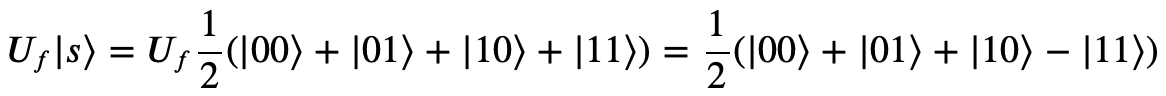

|11>の符号反転を実現するには、コントロールZゲートを初期状態に適用するだけです。これは、次の回路に繋がります。

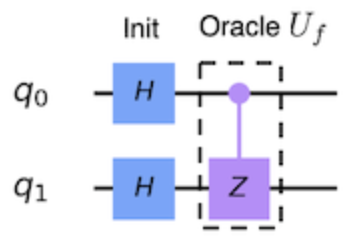

#### Oracle for |w> = |00>

|w> = |00>の場合、オラクルUfは次のように機能します。

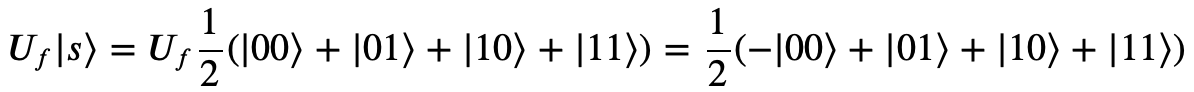

|00>の符号反転を実現するには、次の回路につながる初期状態に"inverted controlled Z gate(反転制御されたZゲート)"を適用する必要があります。

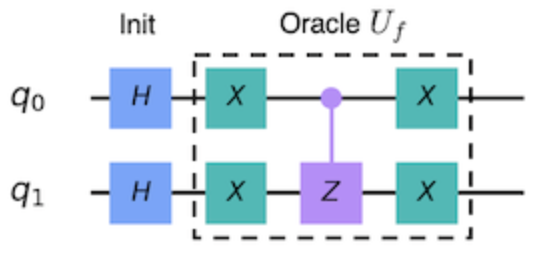

#### Oracles for |w> = |01> and |w> = |10>

上記のロジックに従って、|w> = |01>(左の回路)と|w> = |10>(右の回路)のオラクルを直接作成できます。

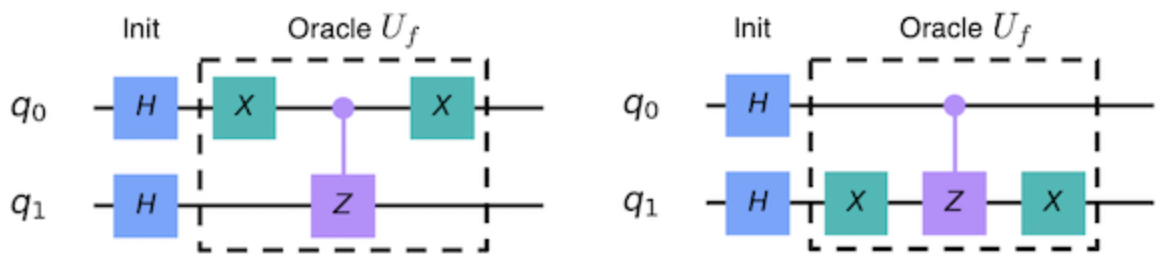

#### Reflection Us

回路を完成させるために、追加の反射を実装する必要があります。Us =  2|s><s| - 𝟙は次のように機能します。

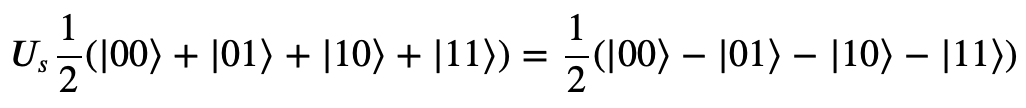

つまり、|00>を除いて、各状態が反転されます。簡単に確認できるように、Usを実装する1つの方法は次の回路です。

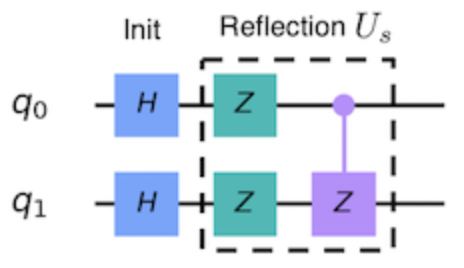

#### Full Circuit for |w> = |00>

N = 4の特定のケースでは1回転しか必要ないため、上記のコンポーネントを組み合わせて、|w> = |00>のケースのGroverアルゴリズムの完全な回路を構築できます。

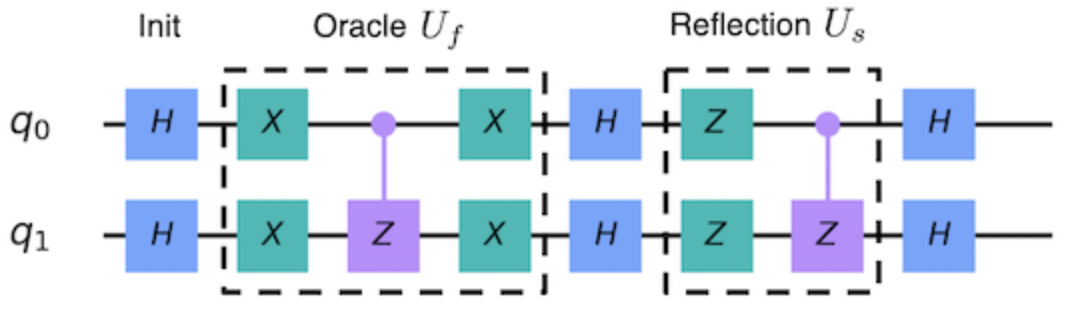

他の3つの回路も同じ方法で作成できるため、ここでは省略します。

### 2.1 Qiskit  Implementation

ここで、|w> = |00>に対して2qubitsの上記のケースに対し、Groverのアルゴリズムを実装します。

In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.visualization import plot_histogram

まず、2つのqubitを持つ量子回路を準備します。

In [2]:
n = 2
grover_circuit = QuantumCircuit(n)

次に、上記の回路のコマンドを書き込むだけです。まず、状態|s>を初期化します。

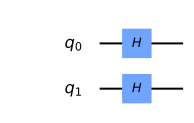

In [3]:
for qubit in range(n):
    grover_circuit.h(qubit)
grover_circuit.draw('mpl')

そして、|w> = |00>にオラクルを適用します。

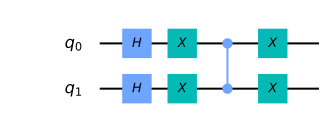

In [4]:
for qubit in range(n):
    grover_circuit.x(qubit)

grover_circuit.cz(0, 1)

for qubit in range(n):
    grover_circuit.x(qubit)

grover_circuit.draw('mpl')

アダマードゲートを両方のqubitに適用します。

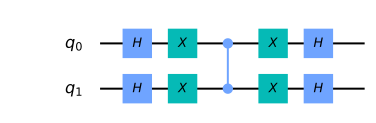

In [5]:
for qubit in range(n):
    grover_circuit.h(qubit)
grover_circuit.draw('mpl')

反射Usを適用します。

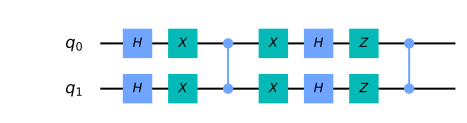

In [6]:
for qubit in range(n):
    grover_circuit.z(qubit)
grover_circuit.cz(0, 1)

grover_circuit.draw('mpl')

そして、最後のアダマードゲートを両方のqubitに適用します。

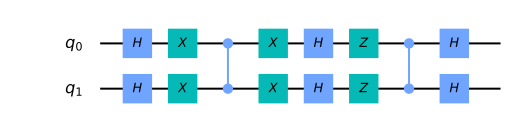

In [7]:
for qubit in range(n):
    grover_circuit.h(qubit)

grover_circuit.draw('mpl')

これで、回路が正しく組み立てられていることがわかります。

### 2.1.1  Experimentwith Simulators

回路をシミュレーションで実行してみましょう。最初に、正しい状態ベクトルがあることを確認できます。

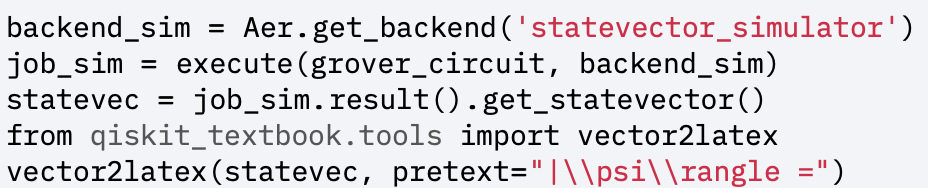

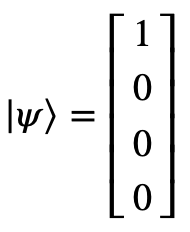

次に、状態を測定し、対応するヒストグラム実験を作成します。

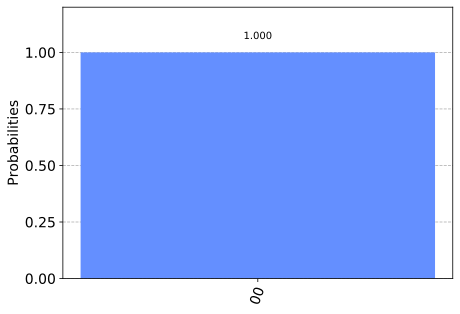

In [8]:
grover_circuit.measure_all()

backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

100%の確率で、要素|00>が見つかる事が確認できます。

### 2.1.2 Experiment with Real Devices

以下のように実際のデバイスでも回路を実行できます。

In [9]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmq_ourense


In [10]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job = execute(grover_circuit, backend=device, shots=1024, max_credits=10)
job_monitor(job, interval = 2)

Job Status: job has successfully run


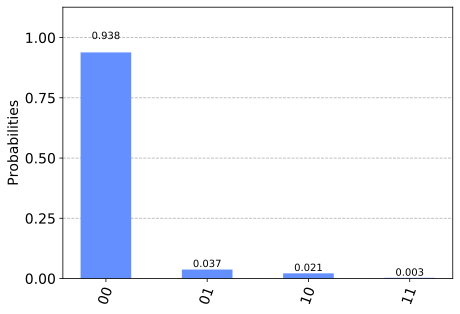

In [11]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

ほとんどの場合、要素|00>が見つかることが確認できました。その他の結果は、量子計算のエラーによるものです。

## 3. Example : 3 Qubits

次に、2つのマークされた状態|101>及び|110>を持つ3qubitsのGroverアルゴリズムの例を検討します。位相オラクルを使用して、問題を解決する量子回路は次のとおりです。

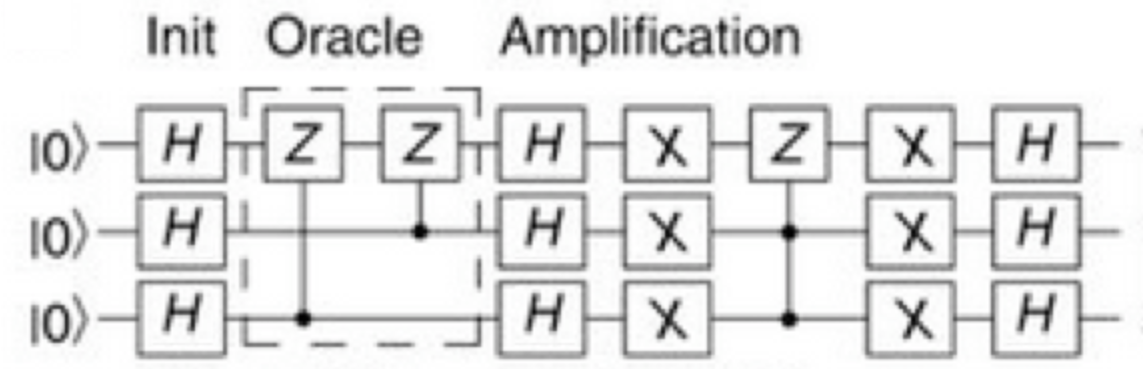

1. |000>に初期化された3つのqubitにアダマールゲートを適用して、均一な重ね合わせを作成します。

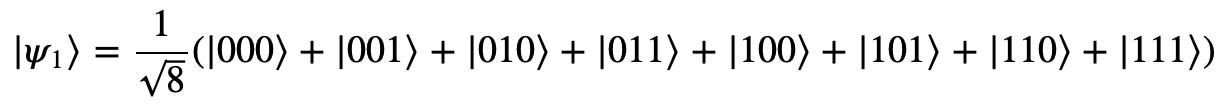

2. 位相オラクルを使用して、|101>と|110>をマークします。

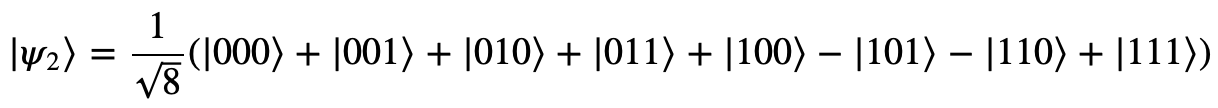

3. 平均振幅の周りで反射を実行します。

3.1 アダマードゲートをqubitsに適用します。

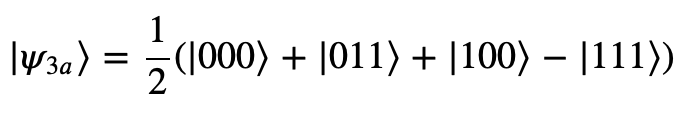

3.2 Xゲートをqubitsに適用します。

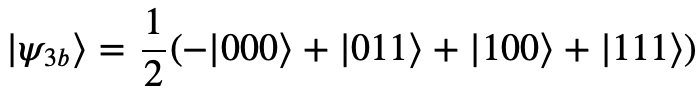

3.3 コントロールZゲートを1,2(controls)と3(target)のqubitの間に適用します。

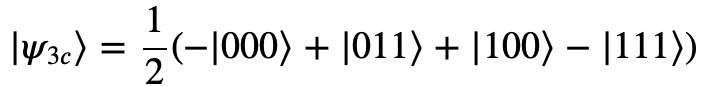

3.4 Xゲートをqubitsに適用します。

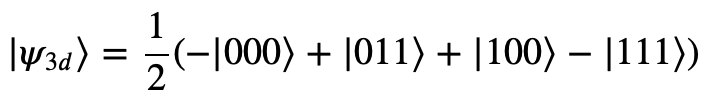

アダマールゲートをqubitsに適用します。

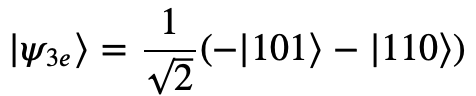

4. |101>及び|110>の状態を取得するために3つのqubitsを測定します。

2つのソリューションと8つの可能性があるため、1回の反復(ステップ2と3)を実行するだけで良いことに注意してください。

### 3.1 Qiskit Implementation

上記の例の3qubitのグローバーアルゴリズムを実装し、2つのマークされた状態|101>及び|110>を検索します。

注：Qiskitはqubitをこのリソースとは逆方向に配列するため、描画された回路は水平方向に反転して表示されます。

|101>と|110>の状態を結果としてマークするフェーズオラクルを作成します。(ステップ1)

In [12]:
def phase_oracle(circuit):
    circuit.cz(0, 2)
    circuit.cz(1, 2)

次に、"diffusion operator(拡張演算子)"としても知られている、平均値を反転する回路をセットアップします。(ステップ2)

In [13]:
def diffuser(circuit):
    """Apply inversion about the average step of Grover's algorithm."""
    qubits = circuit.qubits
    nqubits = len(qubits)
    
    for q in range(nqubits):
        circuit.h(q)
        circuit.x(q)
    
    # Do controlled-Z
    circuit.h(2)
    circuit.ccx(0,1,2)
    circuit.h(2)
    
    for q in range(nqubits):
        circuit.x(q)
        circuit.h(q)

次に、回路の最初に均一な重ね合わせを作成し、最後に測定を行なって、ピースを組み立てます。2つのソリューションと8つの可能性があるため、1回の反復を実行するだけで良いことに注意してください。

In [14]:
n = 3
barriers = True

grover_circuit = QuantumCircuit(n)

for qubit in range(n):
    grover_circuit.h(qubit)

if barriers:
    grover_circuit.barrier()

phase_oracle(grover_circuit)

if barriers:
    grover_circuit.barrier()

diffuser(grover_circuit)

grover_circuit.measure_all()

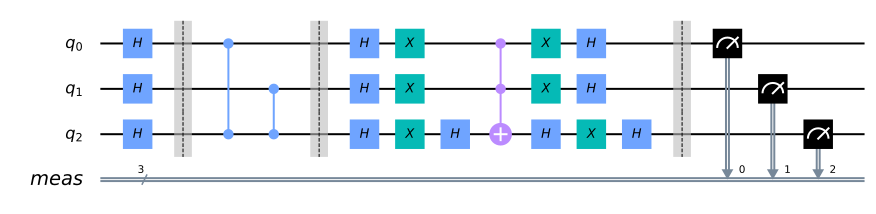

In [15]:
grover_circuit.draw(output="mpl")

### 3.1.1 Experiment with Simulators

上記の回路をシミュレータで実行できます。

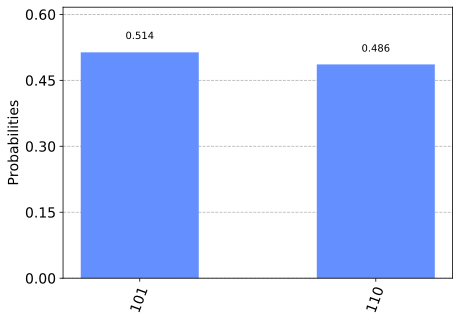

In [16]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

見てわかるように、アルゴリズムはマークされた状態|101>と|110>を発見しました。

### 3.1.2 Experiment with Real Devices

以下のように、実際のデバイスで回路を実行できます。

In [17]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_ourense


In [18]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(grover_circuit, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


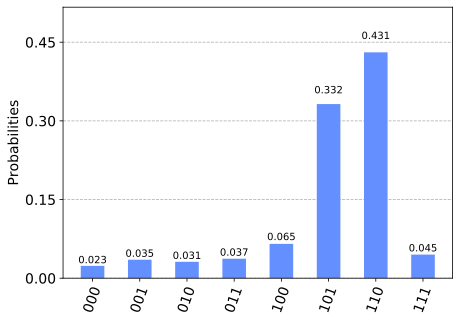

In [19]:
# Get the results from the computation
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

(うまくいけば)わかるように、アルゴリズムはマークされた状態|101>及び|110>を検出します。その他の結果は、量子計算のエラーによるものです。

## 4. Problems

1. 上記のグローバーアルゴリズムのexampleとimplementationは、2つのマークされた3qubits状態|101>と|110>を見つけることでした。実装を変更して、マーク付きの2qubits状態|01>を見つけるようにしてください。結果は期待通りでしたか？説明して下さい。

2. 上記のグローバーアルゴリズムのexampleとimplementationは、2つのマークされた3qubits状態|101>と|110>を見つけることでした。実装を変更して、マーク付きの4qubits状態|0101>を見つけるようにしてください。結果は期待通りでしたか？説明してください。